In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline


In [3]:
import plotly
plotly.tools.set_credentials_file(username='salman1127', api_key='kvVBOPH8QBqLKiDTYguH')
import plotly.plotly as py
import plotly.graph_objs as go

In [4]:
#import excel file
data = pd.read_excel("Sample_data.xlsx", skipinitialspace=True)
df=data.copy()

<h4 style="color:red;">Task1 : Some Basic Operations on Data Frame </h4>

**Show first five record of data frame **

In [5]:
df.head()

,Customer ID,U_OB_VC_CNT_T6,U_OB_VC_CC_CNT_T6,U_OB_VC_DUR_T6,U_OB_VC_REV_T6,U_OB_DAY_VC_CNT_T6,U_OB_DAY_VC_CC_CNT_T6,U_OB_DAY_VC_DUR_T6,U_OB_DAY_VC_REV_T6,U_OB_EVN_VC_CNT_T6,...,RECH_750_1000_AMT_T6,RECH_750_1000_CNT_T6,RECH_GT_1000_AMT_T6,RECH_GT_1000_CNT_T6,RECEIVE_AMT_T6,RECEIVE_CNT_T6,SHARE_AMT_T6,SHARE_CNT_T6,LOAN_AMT_T6,LOAN_CNT_T6
NaN,1,157,88,379.0,230.070,103,62,207.0,128.794,51,...,0,0,0,0,0,0,0,0,45,3
NaN,2,41,38,132.5,137.276,17,14,65.0,77.824,23,...,0,0,0,0,25.523,1,0,0,60,4
NaN,3,321,185,274.5,98.422,249,150,204.0,49.151,69,...,0,0,0,0,0,0,0,0,0,0
NaN,4,11,6,172.5,7.587,1,1,2.0,0.149,10,...,0,0,0,0,0,0,0,0,0,0
NaN,5,313,220,2888.0,52.915,170,131,791.0,29.699,132,...,0,0,0,0,0,0,0,0,15,1


In [6]:
df.reset_index(drop=True, inplace=True)

**Show last five record of data frame **

In [7]:
df.tail()

,Customer ID,U_OB_VC_CNT_T6,U_OB_VC_CC_CNT_T6,U_OB_VC_DUR_T6,U_OB_VC_REV_T6,U_OB_DAY_VC_CNT_T6,U_OB_DAY_VC_CC_CNT_T6,U_OB_DAY_VC_DUR_T6,U_OB_DAY_VC_REV_T6,U_OB_EVN_VC_CNT_T6,...,RECH_750_1000_AMT_T6,RECH_750_1000_CNT_T6,RECH_GT_1000_AMT_T6,RECH_GT_1000_CNT_T6,RECEIVE_AMT_T6,RECEIVE_CNT_T6,SHARE_AMT_T6,SHARE_CNT_T6,LOAN_AMT_T6,LOAN_CNT_T6
95,96,210,96,863.0,37.825,65,42,216.0,9.710,128,...,0,0,0,0,0,0,0,0,90,6
96,97,30,26,326.0,45.349,23,21,169.0,42.152,4,...,0,0,0,0,0,0,0,0,0,0
97,98,10,6,226.0,1.495,5,2,82.0,0.747,4,...,0,0,0,0,0,0,0,0,15,1
98,99,194,72,296.0,176.593,30,19,33.0,20.677,133,...,0,0,0,0,0,0,0,0,15,1
99,100,146,36,1250.0,51.714,73,25,579.0,28.000,71,...,0,0,0,0,0,0,0,0,75,5


**Show shape of the data frame **

In [8]:
df.shape

(100, 474)

In [9]:
df.columns

Index(['Customer ID', 'U_OB_VC_CNT_T6', 'U_OB_VC_CC_CNT_T6', 'U_OB_VC_DUR_T6',
       'U_OB_VC_REV_T6', 'U_OB_DAY_VC_CNT_T6', 'U_OB_DAY_VC_CC_CNT_T6',
       'U_OB_DAY_VC_DUR_T6', 'U_OB_DAY_VC_REV_T6', 'U_OB_EVN_VC_CNT_T6',
       ...
       'RECH_750_1000_AMT_T6', 'RECH_750_1000_CNT_T6', 'RECH_GT_1000_AMT_T6',
       'RECH_GT_1000_CNT_T6', 'RECEIVE_AMT_T6', 'RECEIVE_CNT_T6',
       'SHARE_AMT_T6', 'SHARE_CNT_T6', 'LOAN_AMT_T6', 'LOAN_CNT_T6'],
      dtype='object', length=474)

**Calculate the sum of null values against each column **

In [10]:
df.isnull().sum()

Customer ID                  0
U_OB_VC_CNT_T6               0
U_OB_VC_CC_CNT_T6            0
U_OB_VC_DUR_T6               0
U_OB_VC_REV_T6               0
U_OB_DAY_VC_CNT_T6           0
U_OB_DAY_VC_CC_CNT_T6        0
U_OB_DAY_VC_DUR_T6           0
U_OB_DAY_VC_REV_T6           0
U_OB_EVN_VC_CNT_T6           0
U_OB_EVN_VC_CC_CNT_T6        0
U_OB_EVN_VC_DUR_T6           0
U_OB_EVN_VC_REV_T6           0
U_OB_NGT_VC_CNT_T6           0
U_OB_NGT_VC_CC_CNT_T6        0
U_OB_NGT_VC_DUR_T6           0
U_OB_NGT_VC_REV_T6           0
U_OB_PEAK_VC_CNT_T6          0
U_OB_PEAK_VC_CC_CNT_T6       0
U_OB_PEAK_VC_DUR_T6          0
U_OB_PEAK_VC_REV_T6          0
U_OB_OFFPEAK_VC_CNT_T6       0
U_OB_OFFPEAK_VC_CC_CNT_T6    0
U_OB_OFFPEAK_VC_DUR_T6       0
U_OB_OFFPEAK_VC_REV_T6       0
U_OB_H_VC_CNT_T6             0
U_OB_H_VC_CC_CNT_T6          0
U_OB_H_VC_DUR_T6             0
U_OB_H_VC_REV_T6             0
U_OB_W_VC_CNT_T6             0
                            ..
RECH_VOUCHER_AMT_T6          0
RECH_VOU

**Fill up null values with 0, all nan and ? values**

In [11]:
df = df.fillna(0)

In [12]:
#df[df.loc[:, 'RECH_AMT_T6':]].str.replace('?', np.nan, inplace=True)
#df.replace('?', np.nan, inplace=True)


**Convert object columns data type to integer or float **

In [13]:
df = df.apply(pd.to_numeric, errors='coerce')

In [14]:
df.dtypes.head()

Customer ID            int64
U_OB_VC_CNT_T6         int64
U_OB_VC_CC_CNT_T6      int64
U_OB_VC_DUR_T6       float64
U_OB_VC_REV_T6       float64
dtype: object

<h4 style="color:red;">Task 2 : Perform Exploratory Data Analysis on Voice Calls </h4>

For example look at these
 - VC Count 
 - VC Revenue 
 - VC Day
 - VC Evening 
 - VC Night 
 - VC Peak 
 - VC Off Peak

In [15]:
df.columns.str.contains('VC').sum()

309

In [16]:
VC = df[['U_OB_VC_CNT_T6', 'U_OB_VC_REV_T6', 'U_OB_DAY_VC_CNT_T6', 'U_OB_EVN_VC_CNT_T6', 'U_OB_NGT_VC_CNT_T6', 'U_OB_PEAK_VC_CNT_T6', 'U_OB_OFFPEAK_VC_CNT_T6']]
VC.head()


,U_OB_VC_CNT_T6,U_OB_VC_REV_T6,U_OB_DAY_VC_CNT_T6,U_OB_EVN_VC_CNT_T6,U_OB_NGT_VC_CNT_T6,U_OB_PEAK_VC_CNT_T6,U_OB_OFFPEAK_VC_CNT_T6
0,157,230.070,103,51,3,26,131
1,41,137.276,17,23,1,11,30
2,321,98.422,249,69,3,40,281
3,11,7.587,1,10,0,8,3
4,313,52.915,170,132,11,92,221


In [17]:
df['U_OB_VC_CNT_T6'].sum()

20205

In [18]:
df['U_OB_VC_REV_T6'].sum()

14011.762000000002

In [19]:
df['U_OB_DAY_VC_CNT_T6'].sum()

11162

In [20]:
df['U_OB_EVN_VC_CNT_T6'].sum()

7355

In [21]:
df['U_OB_NGT_VC_CNT_T6'].sum()

1688

In [22]:
df['U_OB_PEAK_VC_CNT_T6'].sum()

3896

In [23]:
df['U_OB_OFFPEAK_VC_CNT_T6'].sum()

16309

In [24]:
vc = df[['U_OB_DAY_VC_CNT_T6', 'U_OB_EVN_VC_CNT_T6', 'U_OB_NGT_VC_CNT_T6']].sum()
vc_df = pd.DataFrame(vc).reset_index()
vc_df

,index,0
0,U_OB_DAY_VC_CNT_T6,11162
1,U_OB_EVN_VC_CNT_T6,7355
2,U_OB_NGT_VC_CNT_T6,1688


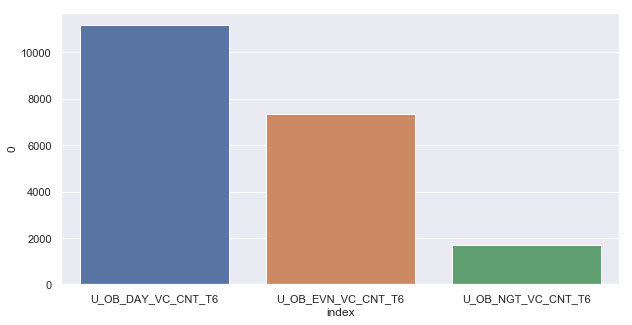

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x='index', y=0, data=vc_df);


<h4 style="color:red;">Task 3 : Perform Exploratory Data Analysis on SMS </h4>

For example look at these
 - SMS Count 
 - SMS Revenue 
 - SMS Day
 - SMS Evening 
 - SMS Night 

In [26]:
df.columns.str.contains('SMS').sum()


68

In [27]:
#sms = df[['U_OB_SMS_FREE_CNT_T6', 'U_OB_SMS_PAID_CNT_T6', 'U_OB_SMS_CNT_T6', 'U_OB_SMS_REV_T6', 'U_OB_DAY_SMS_CNT_T6', 'U_OB_EVN_SMS_CNT_T6', 'U_OB_NGT_SMS_CNT_T6']]
SMS = df[['U_OB_SMS_CNT_T6', 'U_OB_SMS_REV_T6', 'U_OB_DAY_SMS_CNT_T6', 'U_OB_EVN_SMS_CNT_T6', 'U_OB_NGT_SMS_CNT_T6']]
SMS.head()


,U_OB_SMS_CNT_T6,U_OB_SMS_REV_T6,U_OB_DAY_SMS_CNT_T6,U_OB_EVN_SMS_CNT_T6,U_OB_NGT_SMS_CNT_T6
0,0,0.000,0,0,0
1,586,2.868,312,244,30
2,2,6.931,0,1,1
3,0,0.000,0,0,0
4,189,0.000,83,91,15


In [28]:
df['U_OB_SMS_CNT_T6'].sum()

18587

In [29]:
df['U_OB_SMS_REV_T6'].sum()

459.02700000000004

In [30]:
df['U_OB_DAY_SMS_CNT_T6'].sum()

8836

In [31]:
df['U_OB_EVN_SMS_CNT_T6'].sum()

8471

In [32]:
df['U_OB_NGT_SMS_CNT_T6'].sum()

1280

In [33]:
sms = df[['U_OB_DAY_SMS_CNT_T6', 'U_OB_EVN_SMS_CNT_T6', 'U_OB_NGT_SMS_CNT_T6']].sum()
sms_df = pd.DataFrame(sms).reset_index()
sms_df

,index,0
0,U_OB_DAY_SMS_CNT_T6,8836
1,U_OB_EVN_SMS_CNT_T6,8471
2,U_OB_NGT_SMS_CNT_T6,1280


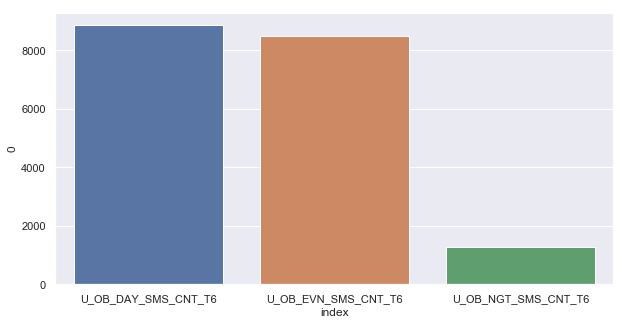

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(x='index', y=0, data=sms_df);



<h4 style="color:red;">Task 4 : Perform Exploratory Data Analysis on GPRS </h4>

In [35]:
df.columns.str.contains('GPRS').sum()


62

In [36]:
GPRS = df[['U_GPRS_CNT_T6', 'U_GPRS_REV_T6', 'U_GPRS_DAY_VOL_T6', 'U_GPRS_EVN_VOL_T6', 'U_GPRS_NGT_VOL_T6']]
GPRS.head()

,U_GPRS_CNT_T6,U_GPRS_REV_T6,U_GPRS_DAY_VOL_T6,U_GPRS_EVN_VOL_T6,U_GPRS_NGT_VOL_T6
0,0,0.00,0,0,0
1,26,20.25,489,66,761
2,3,0.00,0,0,61
3,0,0.00,0,0,0
4,0,0.00,0,0,0


In [37]:
df['U_GPRS_CNT_T6'].sum()

2104

In [38]:
df['U_GPRS_REV_T6'].sum()

166.23

In [39]:
df['U_GPRS_DAY_VOL_T6'].sum()

9337777

In [40]:
df['U_GPRS_EVN_VOL_T6'].sum()

4475266

In [41]:
df['U_GPRS_NGT_VOL_T6'].sum()

3536520

In [42]:
gprs = df[['U_GPRS_DAY_VOL_T6', 'U_GPRS_EVN_VOL_T6', 'U_GPRS_NGT_VOL_T6']].sum()
gprs_df = pd.DataFrame(gprs).reset_index()
gprs_df

,index,0
0,U_GPRS_DAY_VOL_T6,9337777
1,U_GPRS_EVN_VOL_T6,4475266
2,U_GPRS_NGT_VOL_T6,3536520


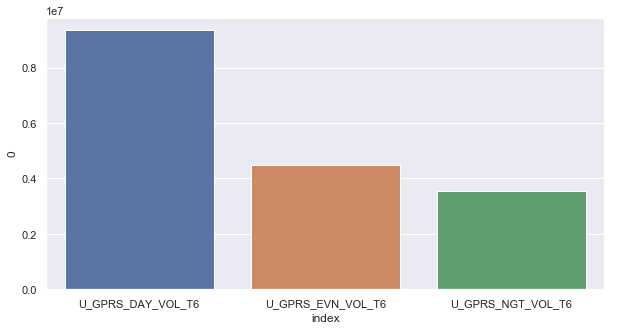

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(x='index', y=0, data=gprs_df )

<h4 style="color:red;">Task 4 : Perform Exploratory Data Analysis on Recharge </h4>

In [44]:
df.columns.str.contains('RECH').sum()


28

In [45]:
RECH = df[['RECH_CNT_T6', 'RECH_0_50_CNT_T6', 'RECH_50_100_CNT_T6', 'RECH_100_150_CNT_T6', 'RECH_150_200_CNT_T6', 'RECH_300_500_CNT_T6', 'RECH_GT_1000_CNT_T6']]
RECH.head()


,RECH_CNT_T6,RECH_0_50_CNT_T6,RECH_50_100_CNT_T6,RECH_100_150_CNT_T6,RECH_150_200_CNT_T6,RECH_300_500_CNT_T6,RECH_GT_1000_CNT_T6
0,6.0,0.0,0.0,6.0,0.0,0.0,0.0
1,4.0,0.0,0.0,4.0,0.0,0.0,0.0
2,8.0,0.0,0.0,8.0,0.0,0.0,0.0
3,3.0,3.0,0.0,0.0,0.0,0.0,0.0
4,6.0,0.0,0.0,6.0,0.0,0.0,0.0


In [46]:
df['RECH_CNT_T6'].sum()

554.0

In [47]:
df['RECH_0_50_CNT_T6'].sum()

121.0

In [48]:
df['RECH_50_100_CNT_T6'].sum()

199.0

In [49]:
df['RECH_100_150_CNT_T6'].sum()

182.0

In [50]:
df['RECH_150_200_CNT_T6'].sum()

16.0

In [51]:
df['RECH_300_500_CNT_T6'].sum()

6.0

In [52]:
df['RECH_GT_1000_CNT_T6'].sum()

2.0

In [53]:
rech = df[['RECH_0_50_CNT_T6', 'RECH_50_100_CNT_T6', 'RECH_100_150_CNT_T6', 'RECH_150_200_CNT_T6', 'RECH_300_500_CNT_T6', 'RECH_GT_1000_CNT_T6']].sum()
rech_df = pd.DataFrame(rech).reset_index()
rech_df



,index,0
0,RECH_0_50_CNT_T6,121.0
1,RECH_50_100_CNT_T6,199.0
2,RECH_100_150_CNT_T6,182.0
3,RECH_150_200_CNT_T6,16.0
4,RECH_300_500_CNT_T6,6.0
5,RECH_GT_1000_CNT_T6,2.0


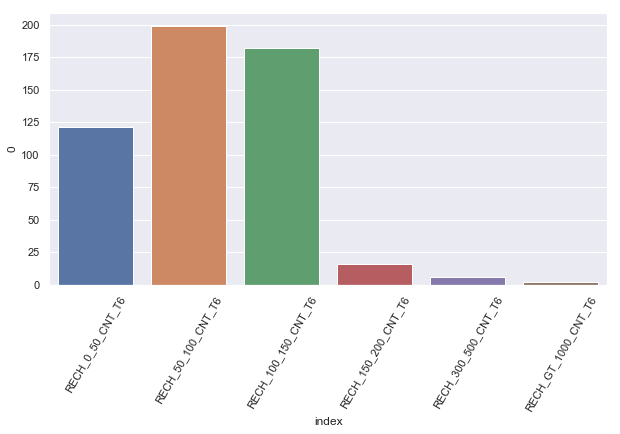

In [54]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
sns.barplot(x='index', y=0, data=rech_df);

#### Revenue of SMS CALL and GPRS

In [55]:
revenue = df[['U_OB_VC_REV_T6', 'U_OB_SMS_REV_T6', 'U_GPRS_REV_T6']].sum()
revenue_df = pd.DataFrame(revenue).reset_index()
revenue_df

,index,0
0,U_OB_VC_REV_T6,14011.762
1,U_OB_SMS_REV_T6,459.027
2,U_GPRS_REV_T6,166.230


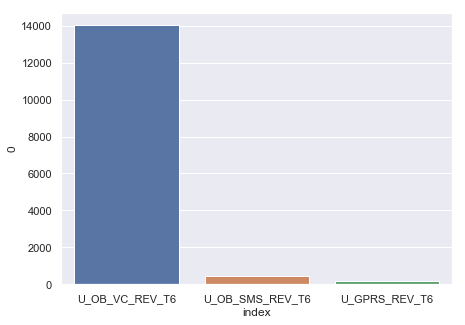

In [56]:
plt.figure(figsize=(7,5))
sns.barplot(x='index', y=0, data=revenue_df);

<h4 style="color:red;">Task 5 : Detect Outliers on Call, SMS, GPRS, Recharge </h4>

Detect outlie of Voice call

In [57]:
np.percentile(df['U_OB_VC_CNT_T6'], [25, 75])

array([ 72.  , 304.75])

In [58]:
vc_q1, vc_q3 = df['U_OB_VC_CNT_T6'].quantile([0.25, 0.75]).values
iqr = vc_q3 - vc_q1
vc_e1 = (vc_q1 - (1.5*iqr))
vc_e2 = (vc_q3 + (1.5*iqr))

In [59]:
vc_e1, vc_e2

(-277.125, 653.875)

In [60]:
df[(df['U_OB_VC_CNT_T6'] < vc_e1) | (df['U_OB_VC_CNT_T6'] > vc_e2)]

,Customer ID,U_OB_VC_CNT_T6,U_OB_VC_CC_CNT_T6,U_OB_VC_DUR_T6,U_OB_VC_REV_T6,U_OB_DAY_VC_CNT_T6,U_OB_DAY_VC_CC_CNT_T6,U_OB_DAY_VC_DUR_T6,U_OB_DAY_VC_REV_T6,U_OB_EVN_VC_CNT_T6,...,RECH_750_1000_AMT_T6,RECH_750_1000_CNT_T6,RECH_GT_1000_AMT_T6,RECH_GT_1000_CNT_T6,RECEIVE_AMT_T6,RECEIVE_CNT_T6,SHARE_AMT_T6,SHARE_CNT_T6,LOAN_AMT_T6,LOAN_CNT_T6
7,8,680,398,1450.0,0.000,475,292,818.5,0.000,197,...,0.0,0.0,0.0,0.0,0.0,0.0,18.1825,1.0,0.0,0.0
26,27,945,400,4049.0,167.450,558,290,2148.0,97.679,311,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,150.0,10.0
39,40,657,388,868.0,0.000,339,230,450.0,0.000,212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,59,665,270,1142.0,2570.612,320,175,516.0,1178.275,247,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,120.0,8.0


Detect outlier of SMS

In [61]:
np.percentile(df['U_OB_SMS_CNT_T6'], [25, 75])

array([ 0., 23.])

In [62]:
sms_q1, sms_q3 = df['U_OB_SMS_CNT_T6'].quantile([0.25, 0.75]).values
iqr = sms_q3 - sms_q1
sms_e1 = (sms_q1 - (1.5*iqr))
sms_e2 = (sms_q3 + (1.5*iqr))

In [63]:
sms_e1, sms_e2

(-34.5, 57.5)

In [64]:
df[(df['U_OB_SMS_CNT_T6'] < sms_e1) | (df['U_OB_SMS_CNT_T6'] > sms_e2)]

,Customer ID,U_OB_VC_CNT_T6,U_OB_VC_CC_CNT_T6,U_OB_VC_DUR_T6,U_OB_VC_REV_T6,U_OB_DAY_VC_CNT_T6,U_OB_DAY_VC_CC_CNT_T6,U_OB_DAY_VC_DUR_T6,U_OB_DAY_VC_REV_T6,U_OB_EVN_VC_CNT_T6,...,RECH_750_1000_AMT_T6,RECH_750_1000_CNT_T6,RECH_GT_1000_AMT_T6,RECH_GT_1000_CNT_T6,RECEIVE_AMT_T6,RECEIVE_CNT_T6,SHARE_AMT_T6,SHARE_CNT_T6,LOAN_AMT_T6,LOAN_CNT_T6
1,2,41,38,132.5,137.276,17,14,65.0,77.824,23,...,0.0,0.0,0.0,0.0,25.5230,1.0,0.0000,0.0,60.0,4.0
4,5,313,220,2888.0,52.915,170,131,791.0,29.699,132,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,15.0,1.0
7,8,680,398,1450.0,0.000,475,292,818.5,0.000,197,...,0.0,0.0,0.0,0.0,0.0000,0.0,18.1825,1.0,0.0,0.0
10,11,203,134,1527.0,121.053,89,71,413.0,96.851,111,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,90.0,6.0
19,20,408,141,1830.0,314.297,142,66,404.0,88.135,208,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,165.0,11.0
25,26,525,255,1465.0,496.929,330,176,975.0,192.538,165,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,45.0,3.0
28,29,44,33,222.0,34.147,41,30,220.0,22.149,2,...,0.0,0.0,0.0,0.0,21.8528,1.0,0.0000,0.0,60.0,4.0
30,31,201,119,913.0,117.971,65,44,417.0,42.991,136,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,120.0,8.0
44,45,503,358,1580.0,101.200,227,177,489.0,33.913,217,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,45.0,3.0
46,47,33,11,183.0,26.439,26,6,165.0,13.443,6,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,30.0,2.0


Detect outlier of GPRS

In [65]:
np.percentile(df['U_GPRS_VOL_T6'], [25, 75])

array([ 0.  , 46.75])

In [66]:
gprs_q1, gprs_q3 = df['U_GPRS_VOL_T6'].quantile([0.25, 0.75]).values
iqr = gprs_q3 - gprs_q1
gprs_e1 = (gprs_q1 - (1.5*iqr))
gprs_e2 = (gprs_q3 + (1.5*iqr))

In [67]:
gprs_e1, gprs_e2

(-70.125, 116.875)

In [68]:
df[(df['U_GPRS_VOL_T6'] < gprs_e1) | (df['U_GPRS_VOL_T6'] > gprs_e2) ]

,Customer ID,U_OB_VC_CNT_T6,U_OB_VC_CC_CNT_T6,U_OB_VC_DUR_T6,U_OB_VC_REV_T6,U_OB_DAY_VC_CNT_T6,U_OB_DAY_VC_CC_CNT_T6,U_OB_DAY_VC_DUR_T6,U_OB_DAY_VC_REV_T6,U_OB_EVN_VC_CNT_T6,...,RECH_750_1000_AMT_T6,RECH_750_1000_CNT_T6,RECH_GT_1000_AMT_T6,RECH_GT_1000_CNT_T6,RECEIVE_AMT_T6,RECEIVE_CNT_T6,SHARE_AMT_T6,SHARE_CNT_T6,LOAN_AMT_T6,LOAN_CNT_T6
1,2,41,38,132.5,137.276,17,14,65.0,77.824,23,...,0.0,0.0,0.0,0.0,25.5230,1.0,0.0000,0.0,60.0,4.0
7,8,680,398,1450.0,0.000,475,292,818.5,0.000,197,...,0.0,0.0,0.0,0.0,0.0000,0.0,18.1825,1.0,0.0,0.0
10,11,203,134,1527.0,121.053,89,71,413.0,96.851,111,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,90.0,6.0
12,13,223,157,518.0,9.560,113,81,202.0,0.000,63,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0
14,15,307,175,610.0,0.000,239,139,424.0,0.000,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,19,116,54,1580.0,89.433,32,24,214.0,34.395,54,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,105.0,7.0
27,28,229,151,498.0,6.000,145,105,296.0,6.000,70,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0
28,29,44,33,222.0,34.147,41,30,220.0,22.149,2,...,0.0,0.0,0.0,0.0,21.8528,1.0,0.0000,0.0,60.0,4.0
36,37,106,61,209.0,12.547,61,39,113.0,5.079,24,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,15.0,1.0
39,40,657,388,868.0,0.000,339,230,450.0,0.000,212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Detect outlier of Recharge

In [69]:
np.percentile(df['RECH_CNT_T6'], [25, 75])

/Users/abdul/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning:

Invalid value encountered in percentile



array([nan, nan])

In [70]:
rech_q1, rech_q3 = df['RECH_CNT_T6'].quantile([0.25, 0.75]).values
iqr = rech_q3 - rech_q1
rech_e1 = (rech_q1 - (1.5*iqr))
rech_e2 = (rech_q3 + (1.5*iqr))

In [71]:
rech_e1, rech_e2

(-5.75, 16.25)

In [72]:
df[(df['RECH_CNT_T6'] < rech_e1) | (df['RECH_CNT_T6'] >  rech_e2)]

,Customer ID,U_OB_VC_CNT_T6,U_OB_VC_CC_CNT_T6,U_OB_VC_DUR_T6,U_OB_VC_REV_T6,U_OB_DAY_VC_CNT_T6,U_OB_DAY_VC_CC_CNT_T6,U_OB_DAY_VC_DUR_T6,U_OB_DAY_VC_REV_T6,U_OB_EVN_VC_CNT_T6,...,RECH_750_1000_AMT_T6,RECH_750_1000_CNT_T6,RECH_GT_1000_AMT_T6,RECH_GT_1000_CNT_T6,RECEIVE_AMT_T6,RECEIVE_CNT_T6,SHARE_AMT_T6,SHARE_CNT_T6,LOAN_AMT_T6,LOAN_CNT_T6
42,43,364,173,953.0,303.422,151,96,438.5,125.106,211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0,7.0
58,59,665,270,1142.0,2570.612,320,175,516.0,1178.275,247,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,8.0


In [73]:
#df.to_excel('test.xlsx')

<h4 style="color:red;">Task 6 : Removed variables with constant values (0) </h4>   

In [74]:
df.shape

(100, 474)

In [75]:
df.fillna(0, inplace=True)

In [76]:
#df.loc[(df!=0).any(1), (df!=0).any(0)]
#df[~np.all(df == 0, axis=1)]
#df.dropna(inplace=True)
df = df.loc[:,(df!=df.iloc[0]).any()]

In [77]:
df.shape

(100, 382)

<h4 style="color:red;">Task 7 : Generate Correlation Matrix and Removed collinearity at a cutoff value of 0.9  </h4>

In [78]:
#corr = df.corr().abs()


In [79]:
#upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

In [80]:
#to_drop = [column for column in corr.columns if any(corr[column] > 0.95)]
#to_drop

In [81]:
#df.drop(df.columns[to_drop], axis=1)
#df.head()

In [82]:
#sns.set()
#plt.figure(figsize=(15,6))
#corr = df.corr()
#sns.heatmap(corr,annot=True);

<h4 style="color:red;">Task 8 : Standardized Min Max Normalization (0-1)  </h4> 

In [83]:
cols = df[['U_OB_VC_CNT_T6', 'U_OB_SMS_CNT_T6', 'U_GPRS_VOL_T6', 'RECH_CNT_T6']]

In [84]:
pred = df.copy()

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
scaler = MinMaxScaler()
new = scaler.fit_transform(cols)

/Users/abdul/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.



In [87]:
type(new)

numpy.ndarray

In [88]:
scaled = pd.DataFrame(columns=cols.columns, data=new)
scaled.head()

,U_OB_VC_CNT_T6,U_OB_SMS_CNT_T6,U_GPRS_VOL_T6,RECH_CNT_T6
0,0.164369,0.000000,0.000000,0.285714
1,0.041357,0.104718,0.000187,0.190476
2,0.338282,0.000357,0.000009,0.380952
3,0.009544,0.000000,0.000000,0.142857
4,0.329799,0.033774,0.000000,0.285714


<h4 style="color:red;">Task 9 : Perform Kmean Clustering  </h4> 

In [89]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled)
pred['kmean'] = kmeans.labels_
pred.head()

,Customer ID,U_OB_VC_CNT_T6,U_OB_VC_CC_CNT_T6,U_OB_VC_DUR_T6,U_OB_VC_REV_T6,U_OB_DAY_VC_CNT_T6,U_OB_DAY_VC_CC_CNT_T6,U_OB_DAY_VC_DUR_T6,U_OB_DAY_VC_REV_T6,U_OB_EVN_VC_CNT_T6,...,RECH_500_750_CNT_T6,RECH_GT_1000_AMT_T6,RECH_GT_1000_CNT_T6,RECEIVE_AMT_T6,RECEIVE_CNT_T6,SHARE_AMT_T6,SHARE_CNT_T6,LOAN_AMT_T6,LOAN_CNT_T6,kmean
0,1,157,88,379.0,230.070,103,62,207.0,128.794,51,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,45.0,3.0,0
1,2,41,38,132.5,137.276,17,14,65.0,77.824,23,...,0.0,0.0,0.0,25.523,1.0,0.0,0.0,60.0,4.0,0
2,3,321,185,274.5,98.422,249,150,204.0,49.151,69,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,1
3,4,11,6,172.5,7.587,1,1,2.0,0.149,10,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0
4,5,313,220,2888.0,52.915,170,131,791.0,29.699,132,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,15.0,1.0,0


In [90]:
pred['kmean'].value_counts()

0    74
1    24
2     2
Name: kmean, dtype: int64

Calculate Silhouette Score

In [91]:
metrics.silhouette_score(scaled, kmeans.labels_)

0.4693456154734884

<h4 style="color:red;">Task 10 : Perform Elbow Analysis  </h4> 

In [92]:
from scipy.spatial.distance import cdist

In [93]:
cost = []

K = range(1,16)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(scaled)
    cost.append(sum(np.min(cdist(scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / scaled.shape[0])

<h4 style="color:red;">Task 11 : Perform Kmean Clustering with best fit k obtained by Elbow Analysis  </h4> 

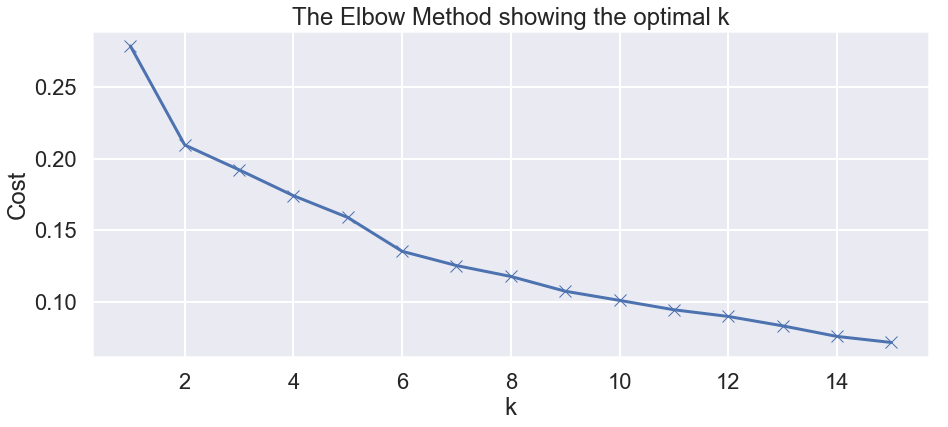

In [94]:
plt.figure(figsize=(15,6))
sns.set_context('poster')
plt.plot(K, cost, 'bx-')
plt.xlabel('k')
plt.ylabel('Cost')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [95]:
kmeans2 = KMeans(n_clusters=4, random_state=0)
kmeans2.fit(scaled)
pred['kmean2'] = kmeans2.labels_
pred.head()

,Customer ID,U_OB_VC_CNT_T6,U_OB_VC_CC_CNT_T6,U_OB_VC_DUR_T6,U_OB_VC_REV_T6,U_OB_DAY_VC_CNT_T6,U_OB_DAY_VC_CC_CNT_T6,U_OB_DAY_VC_DUR_T6,U_OB_DAY_VC_REV_T6,U_OB_EVN_VC_CNT_T6,...,RECH_GT_1000_AMT_T6,RECH_GT_1000_CNT_T6,RECEIVE_AMT_T6,RECEIVE_CNT_T6,SHARE_AMT_T6,SHARE_CNT_T6,LOAN_AMT_T6,LOAN_CNT_T6,kmean,kmean2
0,1,157,88,379.0,230.070,103,62,207.0,128.794,51,...,0.0,0.0,0.000,0.0,0.0,0.0,45.0,3.0,0,0
1,2,41,38,132.5,137.276,17,14,65.0,77.824,23,...,0.0,0.0,25.523,1.0,0.0,0.0,60.0,4.0,0,0
2,3,321,185,274.5,98.422,249,150,204.0,49.151,69,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,1,1
3,4,11,6,172.5,7.587,1,1,2.0,0.149,10,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0,0
4,5,313,220,2888.0,52.915,170,131,791.0,29.699,132,...,0.0,0.0,0.000,0.0,0.0,0.0,15.0,1.0,0,0


In [96]:
pred['kmean2'].value_counts()

0    70
1    26
3     2
2     2
Name: kmean2, dtype: int64

#### Calculate Silhouette Score

In [97]:
metrics.silhouette_score(scaled, kmeans.labels_)

0.4693456154734884

<h4 style="color:red;">Task 12 : Do profiling with clusters and make radar and snake plot only on GPRS, CALL, SMS, RECHARGE </h4> 

In [98]:
p_ = pred[['U_OB_VC_CNT_T6', 'U_OB_SMS_CNT_T6', 'U_GPRS_VOL_T6', 'RECH_CNT_T6', 'kmean2']]
pivoted = p_.groupby('kmean2')['U_OB_VC_CNT_T6', 'U_OB_SMS_CNT_T6', 'U_GPRS_VOL_T6', 'RECH_CNT_T6'].mean().reset_index()
pivoted


,kmean2,U_OB_VC_CNT_T6,U_OB_SMS_CNT_T6,U_GPRS_VOL_T6,RECH_CNT_T6
0,0,113.557143,108.328571,3.804321e+04,3.742857
1,1,442.423077,61.423077,4.170212e+04,10.115385
2,2,213.000000,112.000000,6.801142e+06,7.000000
3,3,163.500000,4591.500000,0.000000e+00,7.500000


In [99]:
radar_data = [
    go.Scatterpolar(
      r = list(pivoted.loc[0,['U_OB_VC_CNT_T6', 'U_OB_SMS_CNT_T6', 'U_GPRS_VOL_T6', 'RECH_CNT_T6']]),
      theta = ['U_OB_VC_CNT_T6', 'U_OB_SMS_CNT_T6', 'U_GPRS_VOL_T6', 'RECH_CNT_T6'],
      fill = 'tonext',
      fillcolor=None,
      name = 'Cluster 0'
    ),
    go.Scatterpolar(
      r = list(pivoted.loc[1,['U_OB_VC_CNT_T6', 'U_OB_SMS_CNT_T6', 'U_GPRS_VOL_T6', 'RECH_CNT_T6']]),
      theta = ['U_OB_VC_CNT_T6', 'U_OB_SMS_CNT_T6', 'U_GPRS_VOL_T6', 'RECH_CNT_T6'],
      fill = 'tonext',
      fillcolor=None,
      name = 'Cluster 1' ),
    go.Scatterpolar(
      r = list(pivoted.loc[2,['U_OB_VC_CNT_T6', 'U_OB_SMS_CNT_T6', 'U_GPRS_VOL_T6', 'RECH_CNT_T6']]),
      theta = ['U_OB_VC_CNT_T6', 'U_OB_SMS_CNT_T6', 'U_GPRS_VOL_T6', 'RECH_CNT_T6'],
      fill = 'tonext',
      fillcolor=None,
      name = 'Cluster 2'
    ),
     go.Scatterpolar(
      r = list(pivoted.loc[3,['U_OB_VC_CNT_T6', 'U_OB_SMS_CNT_T6', 'U_GPRS_VOL_T6', 'RECH_CNT_T6']]),
      theta = ['U_OB_VC_CNT_T6', 'U_OB_SMS_CNT_T6', 'U_GPRS_VOL_T6', 'RECH_CNT_T6'],
      fill = 'tonext',
      fillcolor=None,
      name = 'Cluster 3'
    ),
]

In [100]:
radar_layout = go.Layout(polar = dict(radialaxis = dict(visible = True,range = [0, 12000])), showlegend = True)

In [101]:
fig = go.Figure(data=radar_data, layout=radar_layout)
py.iplot(fig, filename = "radar")

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~salman1127/0 or inside your plot.ly account where it is named 'radar'


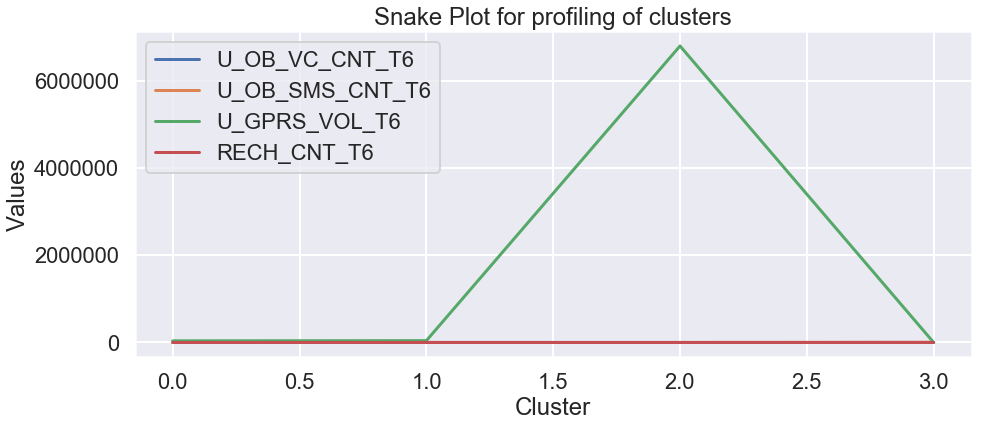

In [102]:
plt.figure(figsize=(15,6))
sns.set_context('poster')
plt.plot(pivoted['kmean2'], pivoted['U_OB_VC_CNT_T6']);
plt.plot(pivoted['kmean2'], pivoted['U_OB_SMS_CNT_T6']);
plt.plot(pivoted['kmean2'], pivoted['U_GPRS_VOL_T6']);
plt.plot(pivoted['kmean2'], pivoted['RECH_CNT_T6']);
plt.xlabel('Cluster');
plt.ylabel('Values');
plt.title('Snake Plot for profiling of clusters');
plt.legend();